In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.fftpack
import math

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

def fft(t, x):
    # Number of samplepoints
    N = len(x)
    # sample spacing
    T = t[1] - t[0] # constant spacing
    # x = np.linspace(0.0, N*T, N)
    # y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
    yf = scipy.fftpack.fft(x)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    a = 2.0/N * np.abs(yf[:N//2])
    i = np.argmax(a)
    # return xf[i]
    

    fig, ax = plt.subplots()
    ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.show()
    return xf[i]

## Konstanten

In [76]:
s_z = 0.003
s_u = 0.2

## Lecherleitung

In [104]:
df_ll = pd.read_csv("./lecherleitung.csv", sep=";")
# plt.figure(figsize=(15, 5))
# plt.errorbar(df_ll["z"].values, df_ll["U"].values, yerr=s_u, xerr=s_z*1000, fmt=",")
# plt.show()

In [105]:
from scipy.optimize import curve_fit

def sin_func(x, a, b, c, d, e):
    return a * np.sin(b * x + c)**2 + (d * x + e)

x = df_ll["z"].values
y = df_ll["U"].values
popt, pcov = curve_fit(sin_func, x, y)

popt

array([-0.03778377,  0.98867512,  2.55107238, -0.01116176,  4.10791069])

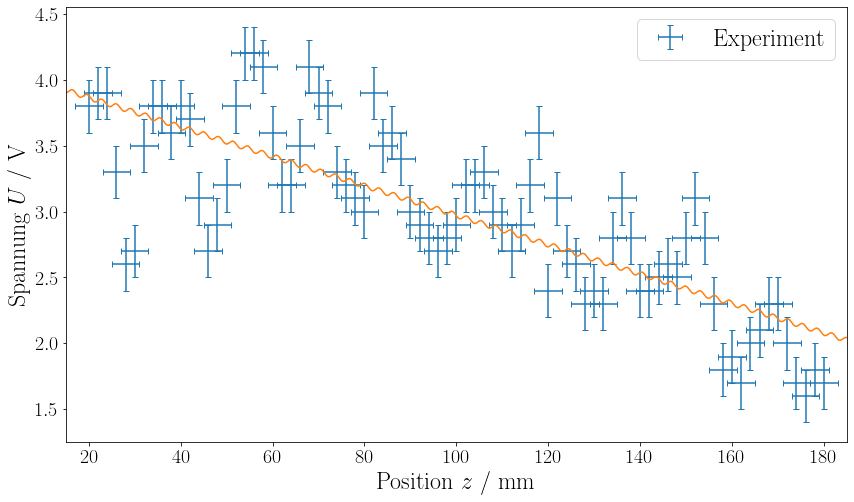

In [106]:
X = np.linspace(0, 185, 1000)
Y = sin_func(X, *popt)
lin_Y = lin_func(X, *lin_popt)

plt.figure(figsize=(14, 8))

plt.errorbar(x, y, yerr=0.2, xerr=3, fmt=",", capsize=3, label="Experiment")

plt.xlim([15, 185])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Position $z$ / mm", fontsize=24)
plt.ylabel("Spannung $U$ / V", fontsize=24)
plt.legend(fontsize=24)

plt.plot(X, Y)
plt.show()

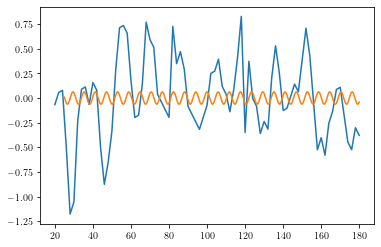

In [107]:
y_bar = y - lin_func(x, *lin_popt)
plt.plot(x, y_bar)

def sin_func(x, a, b, c):
    return a * np.sin(b * x + c)

popt, pcov = curve_fit(sin_func, x, y_bar)
X = np.linspace(25, 180, 1000)
Y = sin_func(X, *popt)
plt.plot(X, Y)

In [108]:
y_bar = y - lin_func(x, *lin_popt)
#plt.plot(x, y_bar)
X_hat = np.linspace(0, 180, 1000)
#plt.plot(X_hat, np.cos((X_hat - 3) * 2 * np.pi * 0.06) * 0.8)
t = x
x = y_bar

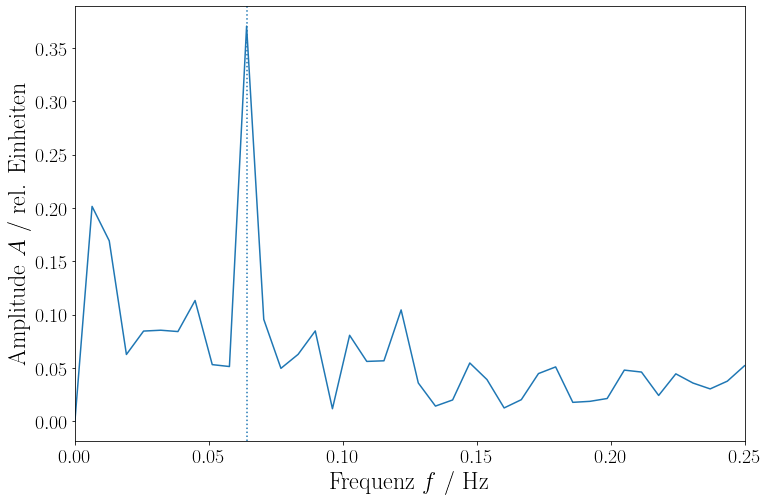

In [117]:
# Number of samplepoints

N = len(x)
# sample spacing
T = t[1] - t[0] # constant spacing
# x = np.linspace(0.0, N*T, N)
# y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(x)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
a = 2.0/N * np.abs(yf[:N//2])
i = np.argmax(a)

plt.figure(figsize=(12, 8))
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Frequenz $f$ / m$^{-1}$", fontsize=24)
plt.ylabel("Amplitude $A$ / rel. Einheiten", fontsize=24)
plt.xlim([0, 0.25])

plt.axvline(xf[i], linestyle="dotted")

plt.show()

## Mikrowellenmessung

In [42]:
df_m = pd.read_csv("./mikrowelle.csv", sep=";")
df_mm = pd.read_csv("./mikrowellen_minmax.csv", sep=";")
exists = np.invert(np.isnan(df_mm["U"].values))

In [119]:
x, y = df_mm["z"][exists], df_mm["U"][exists]

y_bar = (y - np.mean(y))
y_bar /= np.max(np.abs(y_bar))
t = x.values
x = y_bar.values

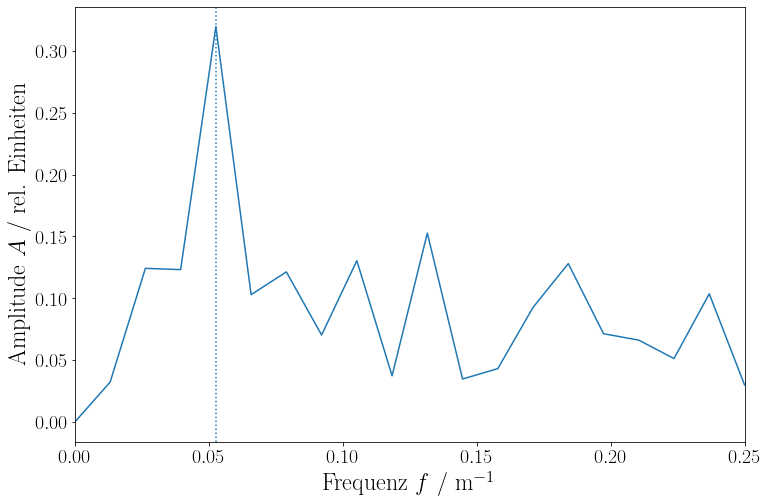

In [121]:
# Number of samplepoints

N = len(x)
# sample spacing
T = t[1] - t[0] # constant spacing
# x = np.linspace(0.0, N*T, N)
# y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(x)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
a = 2.0/N * np.abs(yf[:N//2])
i = np.argmax(a)

plt.figure(figsize=(12, 8))
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Frequenz $f$ / m$^{-1}$", fontsize=24)
plt.ylabel("Amplitude $A$ / rel. Einheiten", fontsize=24)
plt.xlim([0, 0.25])

plt.axvline(xf[i], linestyle="dotted")

plt.show()

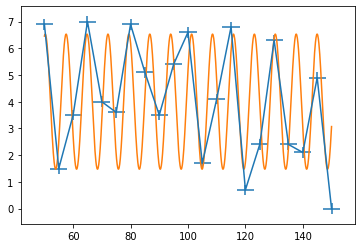

In [44]:
from scipy.optimize import curve_fit

def func(x, a, b, c, d):
    return a * np.sin(b * x + c) + d
x = df_m["z"].values
y = df_m["U"].values
popt, pcov = curve_fit(func, x, y)

X = np.linspace(50, 150, 1000)
Y = func(X, *popt)
plt.errorbar(x, y, yerr=0.2, xerr=3)

plt.plot(X, Y)

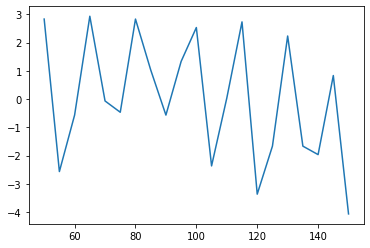

In [45]:
y_bar = y - np.mean(y)
plt.plot(x, y_bar)
plt.show()

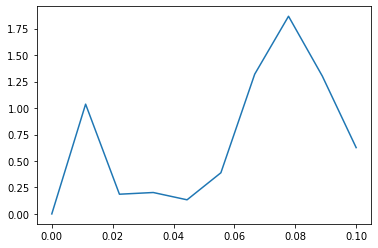

0.07777777777777778

In [46]:
fft(x, y_bar)

## Brechungsindex PVC Platte

In [24]:
df_pvc = pd.read_csv("./pvc.csv", sep=";")
df_pvc["dz"] = df_pvc["z_2"] - df_pvc["z_1"]
dz_mean, dz_std = np.mean(df_pvc["dz"].values) / 1000, s_z
dz_mean, dz_std

(0.013333333333333334, 0.003)

\begin{equation}
    \Delta \lambda = b \left(\frac{c_0}{c_M} - 1\right)
\end{equation}

\begin{equation}
    n = \frac{\Delta \lambda}{b} + 1
\end{equation}

In [118]:
(dz_mean / 0.02) + 1, ((dz_mean - dz_std) / 0.02) + 1, ((dz_mean + dz_std) / 0.02) + 1

(1.6666666666666667, 1.5166666666666666, 1.8166666666666669)